# Team Gimbap


In unserem team-projekt haben wir [World Happiness dataset](https://www.kaggle.com/unsdsn/world-happiness) und [Suicide rate estimate dataset](https://apps.who.int/gho/data/node.main.MHSUICIDEASDR?lang=en) verwendet.  

Der "World Happiness Report" ist ein wegweisender Überblick über den Zustand des globalen Glücks. Der Bericht findet weiterhin weltweite Anerkennung, da Regierungen, Organisationen und die Zivilgesellschaft zunehmend Glücksindikatoren verwenden, um ihre politischen Entscheidungen zu treffen. Führende Experten aus verschiedenen Bereichen, wie Wirtschaft, Psychologie, öffentliche Politik und anderen verwenden die Analyse des Wohlbefindens für Bewertung des Fortschritts in einzelnen Ländern. 

Die Glückswerte stammen aus der [Gallup World Poll] (https://www.gallup.com/analytics/232838/world-poll.aspx). Die Bewertungen basieren auf der Umfrage zur Bewertung des Lebens. 



Die Befragten bewerteten ihre Lebensumstände auf einer Skala von 0 bis 10, wobei die Punktzahl 10 dem insgesamt bestmöglichen Leben

The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The

Die Ergebnisse stammen aus national repräsentativen Stichproben für die Jahre 2013-2016 und verwenden die Gallup-Gewichtung, um die Schätzungen repräsentativ zu machen. Die Spalten im Anschluss an den Glücksscore schätzen das Ausmaß, in dem jeder der sechs Faktoren - wirtschaftliche Produktion, soziale Unterstützung, Lebenserwartung, Freiheit, Korruptionsfreiheit und Großzügigkeit - dazu beiträgt, dass die Bewertungen des Lebens in jedem Land höher ausfallen als in Dystopia, einem hypothetischen Land, das für jeden der sechs Faktoren Werte aufweist, die den niedrigsten nationalen Durchschnittswerten der Welt entsprechen. Sie haben keinen Einfluss auf die für jedes Land gemeldete Gesamtpunktzahl, aber sie erklären, warum einige Länder einen höheren Rang einnehmen als andere.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

#upload and clean suicide data
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
df_suicide = pd.read_csv("./data.csv").drop(0).rename(
    columns={"Unnamed: 0": "Country", "Unnamed: 1": "sex", 
             "Age-standardized suicide rates (per 100 000 population).1": "Suicide rate per 10^5"}).drop(
    columns= ["Age-standardized suicide rates (per 100 000 population)",  
                       "Age-standardized suicide rates (per 100 000 population).2", 
                       "Age-standardized suicide rates (per 100 000 population).3"])

#upload and clean happiness data
df_happiness = pd.read_csv("./hapiness.csv", 
                          usecols=['Country', 'Happiness Score', 'Family', 'Trust (Government Corruption)', 
                                   'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom']). sort_values("Country")
 
#merge two datasets
df = df_happiness.merge(df_suicide, on="Country").drop(columns=['Family', 'Trust (Government Corruption)', 
                                   'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom'])

dataframe_filtered=df[df["sex"]=="Both sexes"].reset_index().drop(columns=['sex', 'index'])
dataframe_filtered.head()



,Country,Happiness Score,Suicide rate per 10^5
0,Afghanistan,3.575,6.6
1,Albania,4.959,5.3
2,Algeria,5.605,3.4
3,Angola,4.033,9.3
4,Argentina,6.574,8.7


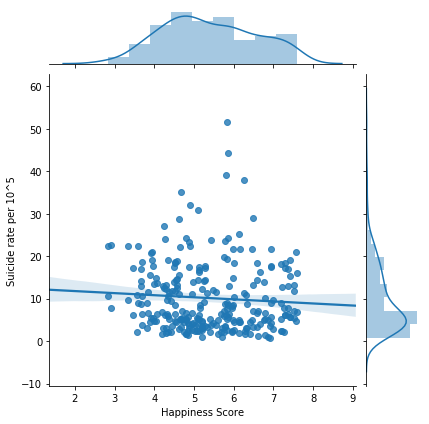

In [2]:
#to compare the correlation for two different sexes

dff = df_happiness.merge(df_suicide, on="Country")
dff=dff[dff["sex"]!="Both sexes"]
dff.loc[dff["sex"]=="Female", "sex"] = True
dff.loc[dff["sex"]=="Male", "sex"] = False

df_male=dff[dff["sex"]==True].drop(columns='sex')
df_female=dff[dff["sex"]==False].drop(columns='sex')

sns.jointplot(x='Happiness Score',
                      y='Suicide rate per 10^5',data=dff, kind="reg");



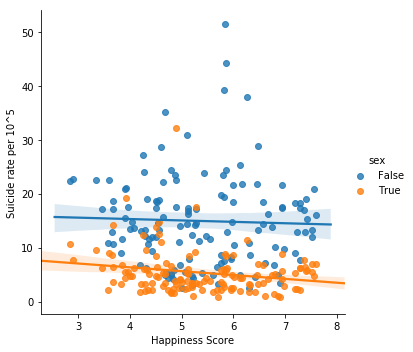

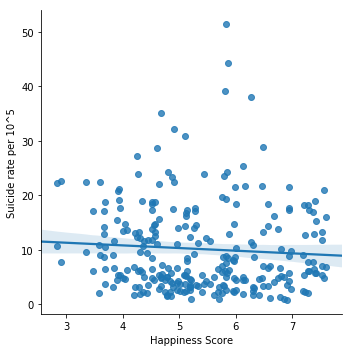

In [3]:
#comparison of linear regression for two sexes
sns.lmplot(x = 'Happiness Score',
                      y ='Suicide rate per 10^5', hue = "sex",data = dff);

#linear regression for both sexes
sns.lmplot(x = 'Happiness Score',
                      y = 'Suicide rate per 10^5', data = dff);

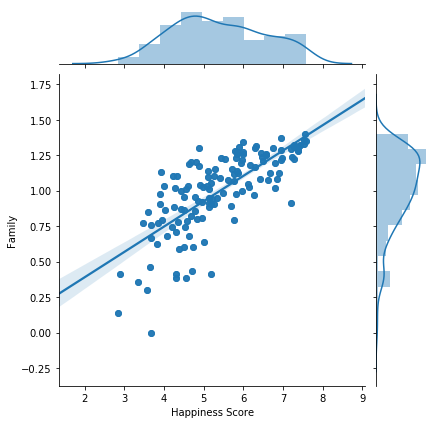

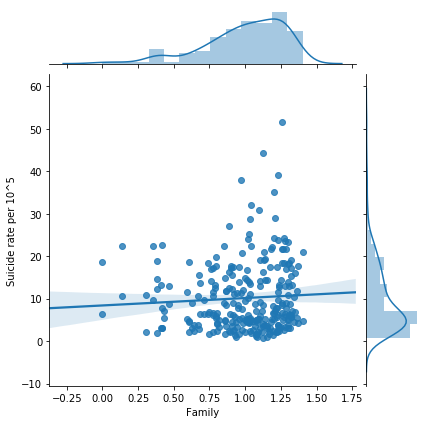

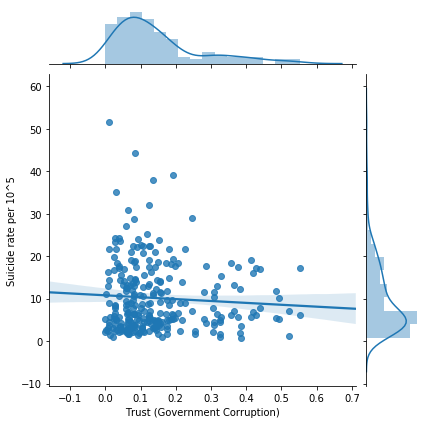

In [4]:
#correlation between different parameters


#happiness positively correlates with family situation
sns.jointplot(x='Happiness Score', y='Family',data=dff, kind="reg");

sns.jointplot(x='Family',
                      y='Suicide rate per 10^5',data=dff, kind="reg");
sns.jointplot(x='Trust (Government Corruption)',
                      y='Suicide rate per 10^5',data=dff, kind="reg");

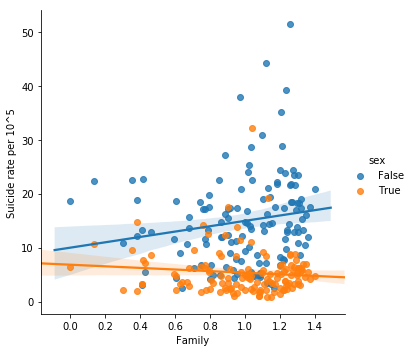

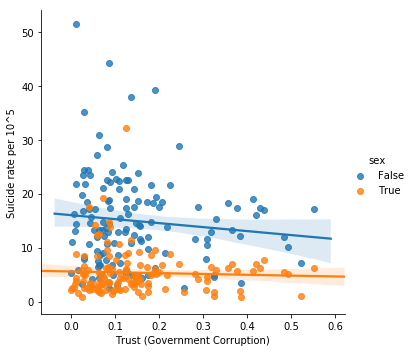

In [5]:
sns.lmplot(x='Family',
                      y='Suicide rate per 10^5', data=dff, hue = 'sex');
sns.lmplot(x='Trust (Government Corruption)',
                      y='Suicide rate per 10^5', data=dff, hue = 'sex');


In [6]:
dataframe_filtered = dataframe_filtered.sort_values(by= 'Happiness Score').reset_index().drop(columns=[ "index"])



X = dataframe_filtered.iloc[:, 1:2].values #2D Array
y = dataframe_filtered.iloc[:, 2].values #1D Array

# SCHAUT ab hier

In [7]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

zipped_lists = zip(X_train, y_train)
sorted_pairs = sorted(zipped_lists)

tuples = zip(*sorted_pairs)
X_train, y_train = [ list(tuple) for tuple in  tuples]

zipped_lists1 = zip(X_test, y_test)
sorted_pairs1 = sorted(zipped_lists1)

tuples1 = zip(*sorted_pairs1)
X_test, y_test = [ list(tuple) for tuple in  tuples1]


Linear Regression degres=1,2,4

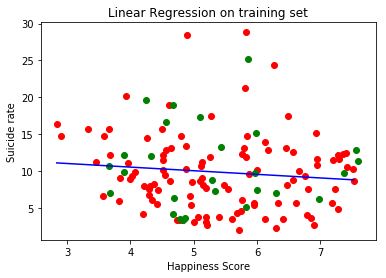

In [10]:
# Fitting Linear Regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X_train, y_train, color='red')
    plt.scatter(X_test, y_test, color='green')
    plt.plot(X_train, lin_reg.predict(X_train), color='blue')
    plt.title('Linear Regression on training set')
    plt.xlabel('Happiness Score')
    plt.ylabel('Suicide rate')
    plt.show()
    return
viz_linear()

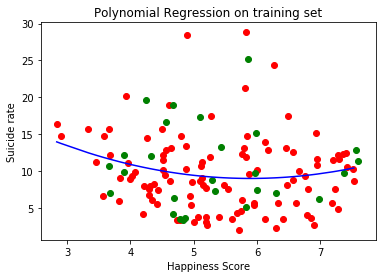

In [11]:
# Fitting Polynomial Regression to the dataset

poly_reg = PolynomialFeatures(degree=2)   
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='red')
    plt.scatter(X_test, y_test, color='green')
    plt.plot(X_train, pol_reg.predict(poly_reg.fit_transform(X_train)), color='blue')
    plt.title('Polynomial Regression on training set')
    plt.xlabel('Happiness Score')
    plt.ylabel('Suicide rate')
    plt.show()
    return
viz_polymonial()

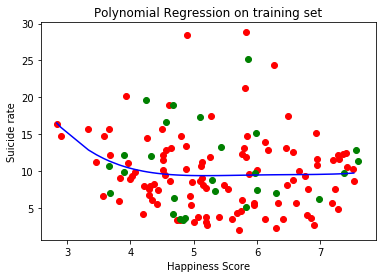

In [12]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

viz_polymonial()

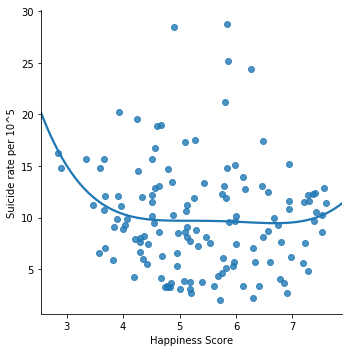

In [13]:
sns.lmplot(x='Happiness Score',
                      y='Suicide rate per 10^5', order=4, ci=None, data=dataframe_filtered)

In [15]:
# Predicting suicide rates for test set with linear regression
lin = lin_reg.predict(X_test)

# Predicting suicide rates for test set with polynomial regression
pol = pol_reg.predict(poly_reg.fit_transform(X_test))

# mean square error for linear regression prediction
print(np.mean((lin-y_test)**2))
print(mean_squared_error(lin,y_test))

# mean square error for polynomial regression prediction
print(np.mean((pol-y_test)**2))

print(r2_score(y_test, lin))

30.407984195104493
30.407984195104493
30.60525310324777
-0.023862441825706737


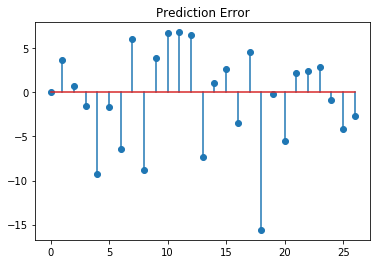

In [16]:
numInstances=len(X_test);

predictedOutput = lin_reg.predict(X_test)
Error=predictedOutput-y_test
plt.stem(np.arange(numInstances),Error)
plt.title('Prediction Error')
plt.show()


#mse1=1.0/numInstances*np.sum((predictedOutput-y)**2)

